#  Succinct statistical description - 1st Dataset

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

%matplotlib inline

plt.style.use('bmh')

#### Loading the data

In [45]:
train_df = pd.read_csv("./data/aps_failure_training_set.csv", header= 14, error_bad_lines=False)
test_df = pd.read_csv("./data/aps_failure_test_set.csv", header= 14, error_bad_lines=False)

In [46]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


In [47]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 20.9+ MB


In [48]:
train_columns = train_df.columns

In [49]:
test_columns = test_df.columns

In [50]:
train_df.describe(include='all')

class        aa_000 ab_000 ac_000 ad_000 ae_000 af_000 ag_000 ag_001  \
count   60000  6.000000e+04  60000  60000  60000  60000  60000  60000  60000   
unique      2           NaN     30   2062   1887    334    419    155    618   
top       neg           NaN     na      0     na      0      0      0      0   
freq    59000           NaN  46329   8752  14861  55543  55476  59133  58587   
mean      NaN  5.933650e+04    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std       NaN  1.454301e+05    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
min       NaN  0.000000e+00    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
25%       NaN  8.340000e+02    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
50%       NaN  3.077600e+04    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
75%       NaN  4.866800e+04    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
max       NaN  2.746564e+06    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

       ag_002  ...   ee_002 ee_003 ee_004 ee_005 ee_006 ee_007 ee_008 ee_009  \
count   60000  ...    60000  60000  60000  60000  60000  60000  60000  60000   
unique   2423  ...    34489  31712  35189  36289  31796  30470  24214   9725   
top         0  ...        0      0      0      0      0      0      0      0   
freq    56181  ...     1364   1557   1797   2814   4458   7898  17280  31863   
mean      NaN  ...      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std       NaN  ...      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
min       NaN  ...      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
25%       NaN  ...      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
50%       NaN  ...      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
75%       NaN  ...      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
max       NaN  ...      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

       ef_000 eg_000  
count   60000  60000  
unique     29     50  
top         0      0  
freq    57021  56794  
mean      NaN    NaN  
std       NaN    NaN  
min       NaN    NaN  
25%       NaN    NaN  
50%       NaN    NaN  
75%       NaN    NaN  
max       NaN    NaN  

[11 rows x 171 columns]

In [51]:
test_df.describe(include='all')

class        aa_000 ab_000 ac_000 ad_000 ae_000 af_000 ag_000 ag_001  \
count   16000  1.600000e+04  16000  16000  16000  16000  16000  16000  16000   
unique      2           NaN     19   1312   1203    171    202     60    222   
top       neg           NaN     na      0     na      0      0      0      0   
freq    15625           NaN  12363   2289   3981  14764  14741  15749  15575   
mean      NaN  6.799698e+04    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std       NaN  5.035350e+05    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
min       NaN  0.000000e+00    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
25%       NaN  9.280000e+02    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
50%       NaN  3.098200e+04    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
75%       NaN  4.947900e+04    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
max       NaN  4.294967e+07    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

       ag_002  ...   ee_002 ee_003 ee_004 ee_005 ee_006 ee_007 ee_008 ee_009  \
count   16000  ...    16000  16000  16000  16000  16000  16000  16000  16000   
unique    801  ...    11938  11039  11818  11916  10832  10272   8315   4043   
top         0  ...        0      0      0      0      0      0      0      0   
freq    14954  ...      356    406    469    735   1151   2061   4500   8432   
mean      NaN  ...      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std       NaN  ...      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
min       NaN  ...      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
25%       NaN  ...      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
50%       NaN  ...      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
75%       NaN  ...      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
max       NaN  ...      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

       ef_000 eg_000  
count   16000  16000  
unique     13     25  
top         0      0  
freq    15167  15107  
mean      NaN    NaN  
std       NaN    NaN  
min       NaN    NaN  
25%       NaN    NaN  
50%       NaN    NaN  
75%       NaN    NaN  
max       NaN    NaN  

[11 rows x 171 columns]

So as we can see, the dataset has 171 attributes (or variables).

In [52]:
train_df.sample(5)

class  aa_000 ab_000 ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002  \
41010   neg     430     na     34     30      0      0      0      0      0   
13384   neg   38126     na      0     na      0      0      0      0      0   
21589   neg   44020      2    674    558      0      0      0      0   2012   
7377    neg    4460     na    226     na      0      0      0      0      0   
48471   neg   41146     na    152    106      0      0      0      0      0   

       ...    ee_002  ee_003  ee_004  ee_005  ee_006 ee_007 ee_008 ee_009  \
41010  ...      5762    3578    2224    3428    2550   1562      0      0   
13384  ...    637580  135822   85046    7892    1920    858    836      0   
21589  ...    444648  206252  280004  559604  482254  27968   6410     12   
7377   ...    100824   43620    4402     192       2      0      0      0   
48471  ...    338826  165656  412512  618730  179234  91328  78738   6656   

      ef_000 eg_000  
41010      0      0  
13384      0      0  
21589      0      0  
7377       0      0  
48471      0      0  

[5 rows x 171 columns]

In [53]:
test_df.sample(5)

class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001  \
8038    neg       0     na          14      4      0      0      0      0   
1326    neg  327616     na          na     na      0      0      0      0   
9720    neg   44402     na  2130706432    126      0      0      0      0   
11969   pos  877476     na          na     na      0      0      0      0   
5588    pos  928780      0         734    418      0      0      0      0   

       ag_002  ...     ee_002   ee_003   ee_004   ee_005   ee_006   ee_007  \
8038        0  ...        280       22       14        4        0        0   
1326   187472  ...    5256668  5092858  1547288  1440850  2974714   201326   
9720        0  ...     362556   177660   333440   356520   192086   142404   
11969       0  ...    5683150  2478424  4596956  4116174  4512586  4137832   
5588        0  ...     665008   329796   746214  1969862  5018946   438778   

         ee_008  ee_009 ef_000 eg_000  
8038          0       0      0      0  
1326       1462       0      0      0  
9720     316788   55022      0      0  
11969  16638458  754962      0      0  
5588       5622       0      0      0  

[5 rows x 171 columns]

#### TRAIN DATASET

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
datadict = pd.DataFrame(train_df.dtypes)
# identify missing values of the 69 columns,add the stats to the datadict
train_df = train_df.replace('na',np.NaN)
datadict['MissingVal'] = train_df.isna().sum()
# Identify number of unique values, For object nunique will the number of levels
datadict['NUnique']=train_df.nunique()
# Identify the count for each variable, add the stats to datadict
datadict['Count']=train_df.count()
# rename the 0 column
datadict = datadict.rename(columns={0:'DataType'})
print(datadict)

       DataType  MissingVal  NUnique  Count
class    object           0        2  60000
aa_000    int64           0    22095  60000
ab_000   object       46329       29  13671
ac_000   object        3335     2061  56665
ad_000   object       14861     1886  45139
ae_000   object        2500      333  57500
af_000   object        2500      418  57500
ag_000   object         671      154  59329
ag_001   object         671      617  59329
ag_002   object         671     2422  59329
ag_003   object         671     7879  59329
ag_004   object         671    23071  59329
ag_005   object         671    40797  59329
ag_006   object         671    40615  59329
ag_007   object         671    32125  59329
ag_008   object         671    18932  59329
ag_009   object         671     5355  59329
ah_000   object         645    43571  59355
ai_000   object         629     4055  59371
aj_000   object         629      894  59371
ak_000   object        4400      159  55600
al_000   object         642     

#### Splitting dataset between 'class' and data

In [56]:
train_df1 = train_df.iloc[:,1:]

In [57]:
train_df_class1 = train_df.iloc[:,:1]
train_df_class = train_df.iloc[:,:1]

In [58]:
train_df1 = train_df1.astype(float)

In [59]:
train_df = pd.concat([train_df_class, train_df1], axis=1)

In [60]:
datadict = pd.DataFrame(train_df.dtypes)
# identify missing values of the 69 columns,add the stats to the datadict
train_df = train_df.replace('na',np.NaN)
datadict['MissingVal'] = train_df.isna().sum()
# Identify number of unique values, For object nunique will the number of levels
datadict['NUnique']=train_df.nunique()
# Identify the count for each variable, add the stats to datadict
datadict['Count']=train_df.count()
# rename the 0 column
datadict = datadict.rename(columns={0:'DataType'})
print(datadict)

       DataType  MissingVal  NUnique  Count
class    object           0        2  60000
aa_000  float64           0    22095  60000
ab_000  float64       46329       29  13671
ac_000  float64        3335     2061  56665
ad_000  float64       14861     1886  45139
ae_000  float64        2500      333  57500
af_000  float64        2500      418  57500
ag_000  float64         671      154  59329
ag_001  float64         671      617  59329
ag_002  float64         671     2422  59329
ag_003  float64         671     7879  59329
ag_004  float64         671    23071  59329
ag_005  float64         671    40797  59329
ag_006  float64         671    40615  59329
ag_007  float64         671    32125  59329
ag_008  float64         671    18932  59329
ag_009  float64         671     5355  59329
ah_000  float64         645    43571  59355
ai_000  float64         629     4055  59371
aj_000  float64         629      894  59371
ak_000  float64        4400      159  55600
al_000  float64         642     

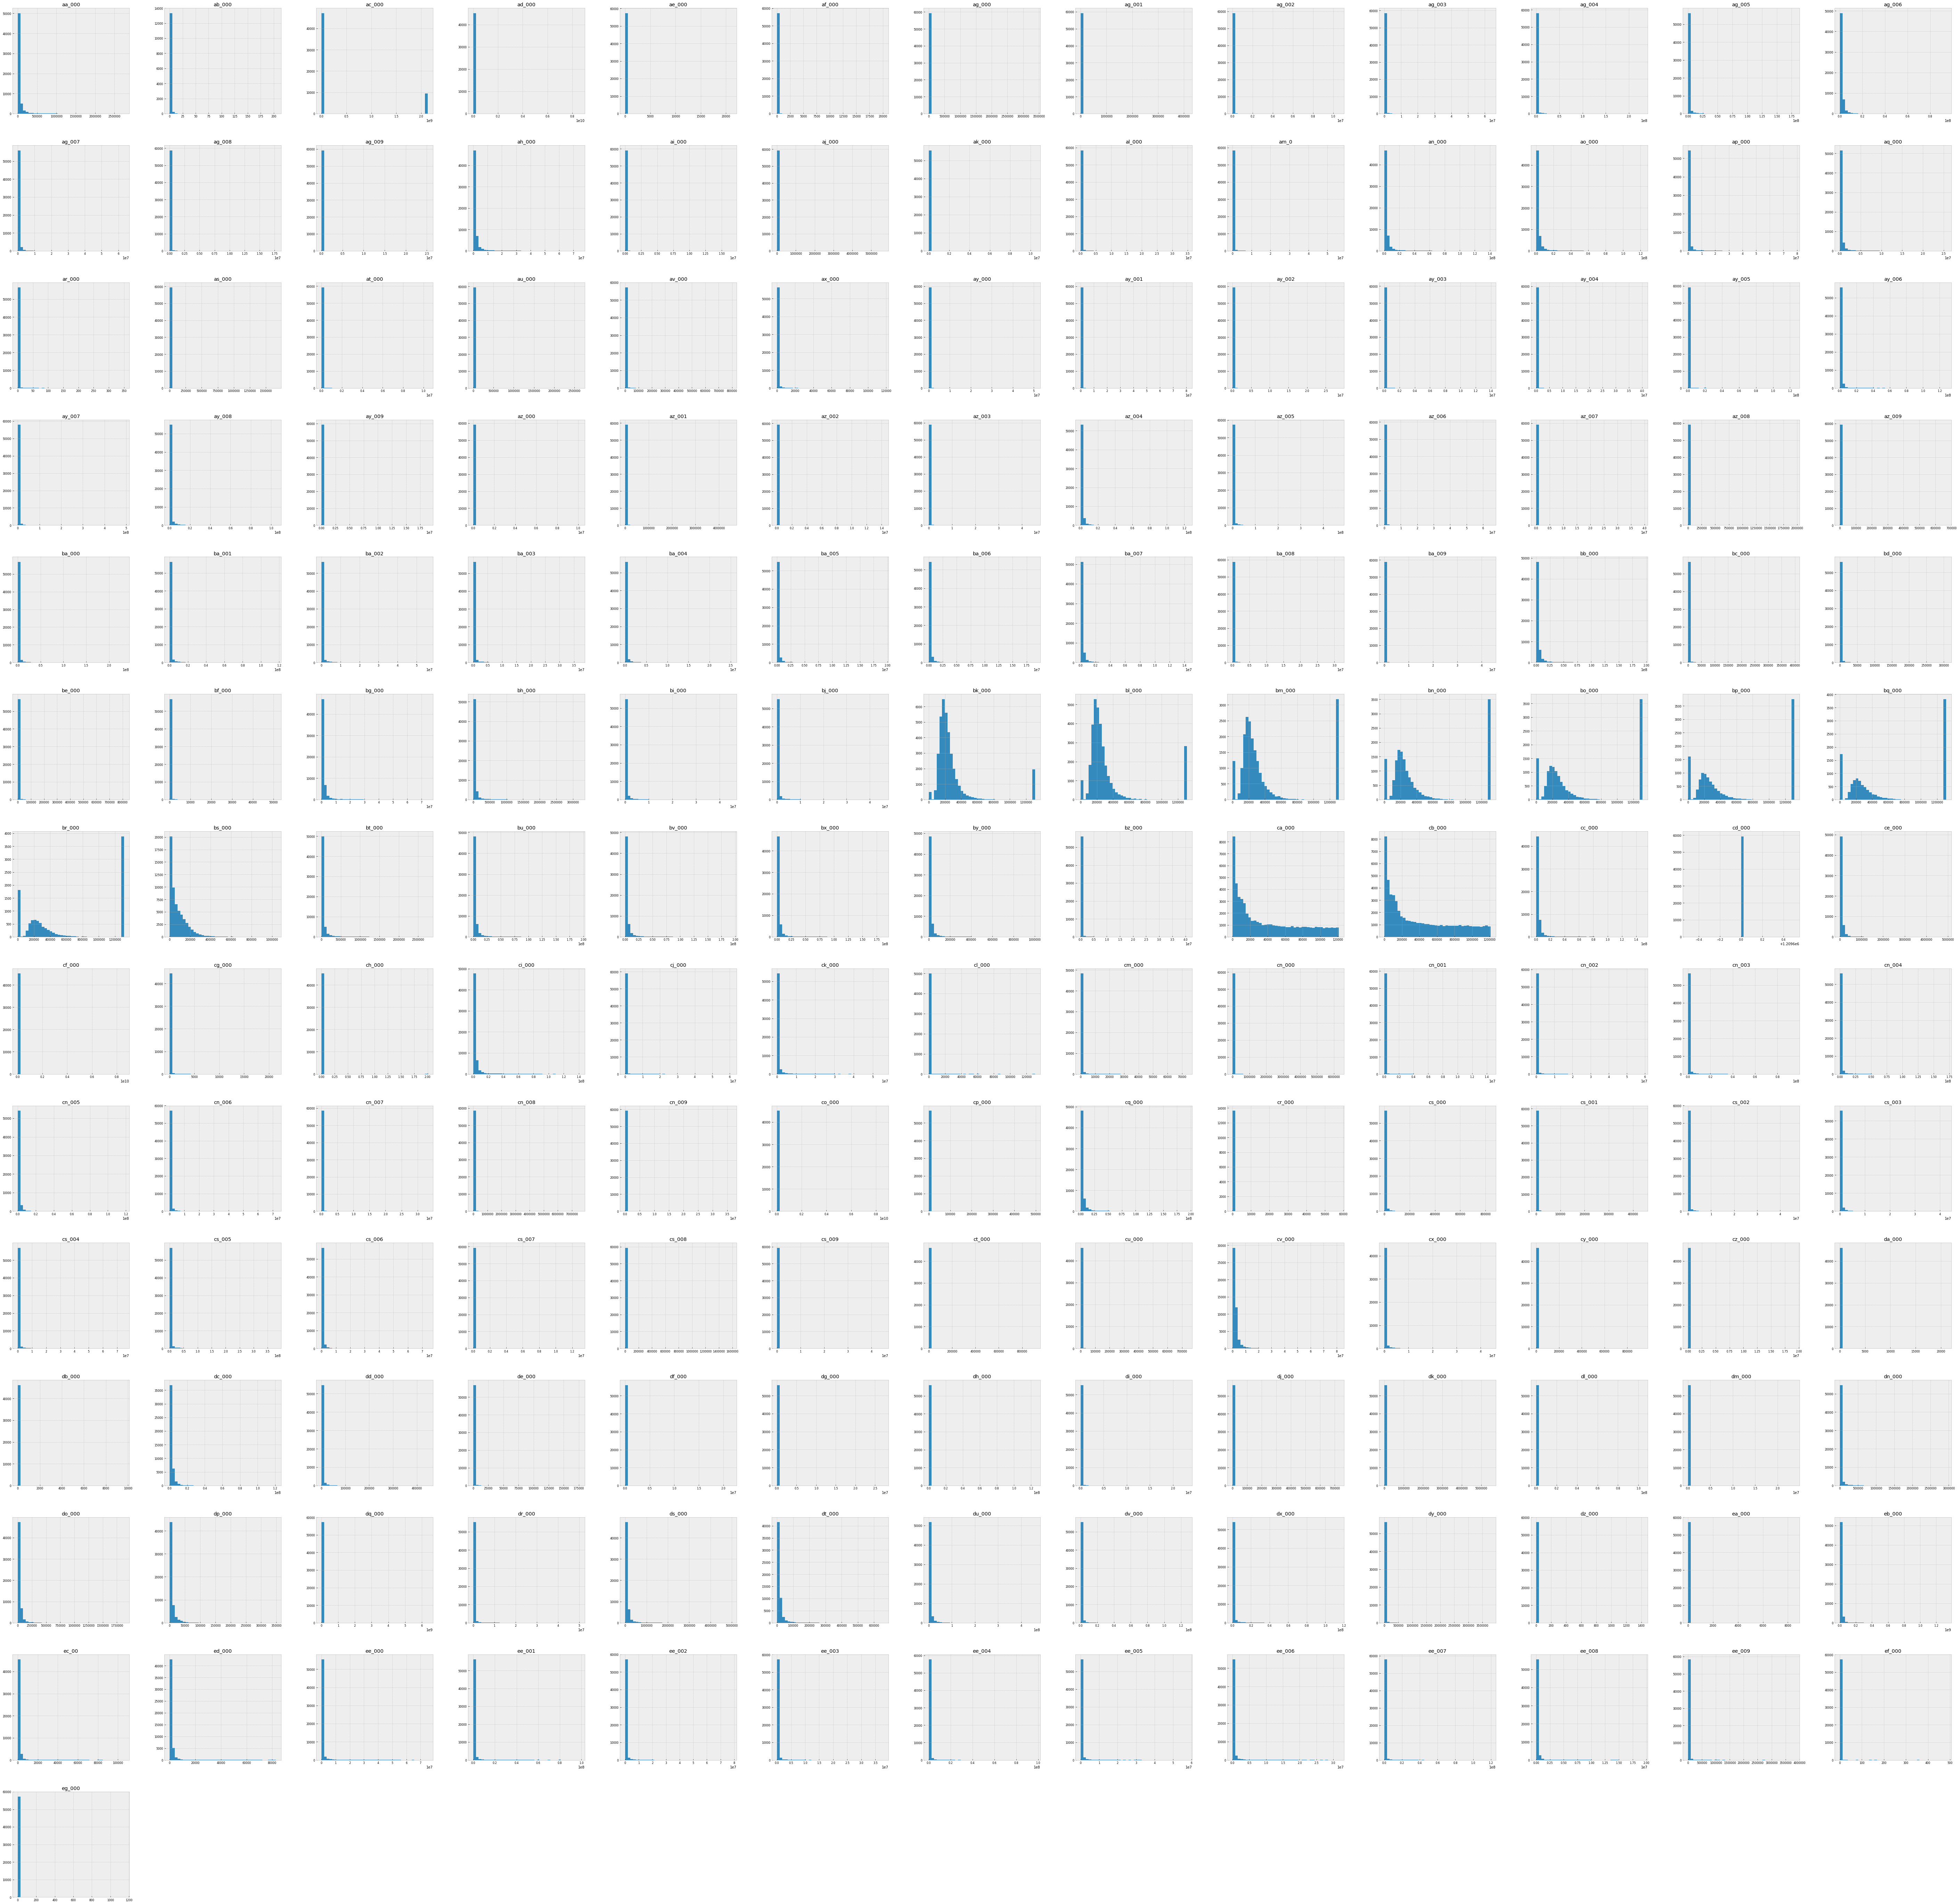

In [61]:
train_df_num = train_df.select_dtypes(include = ['object', 'float64'])
train_df.hist(figsize=(100, 100), bins=40, xlabelsize=8, ylabelsize=8);

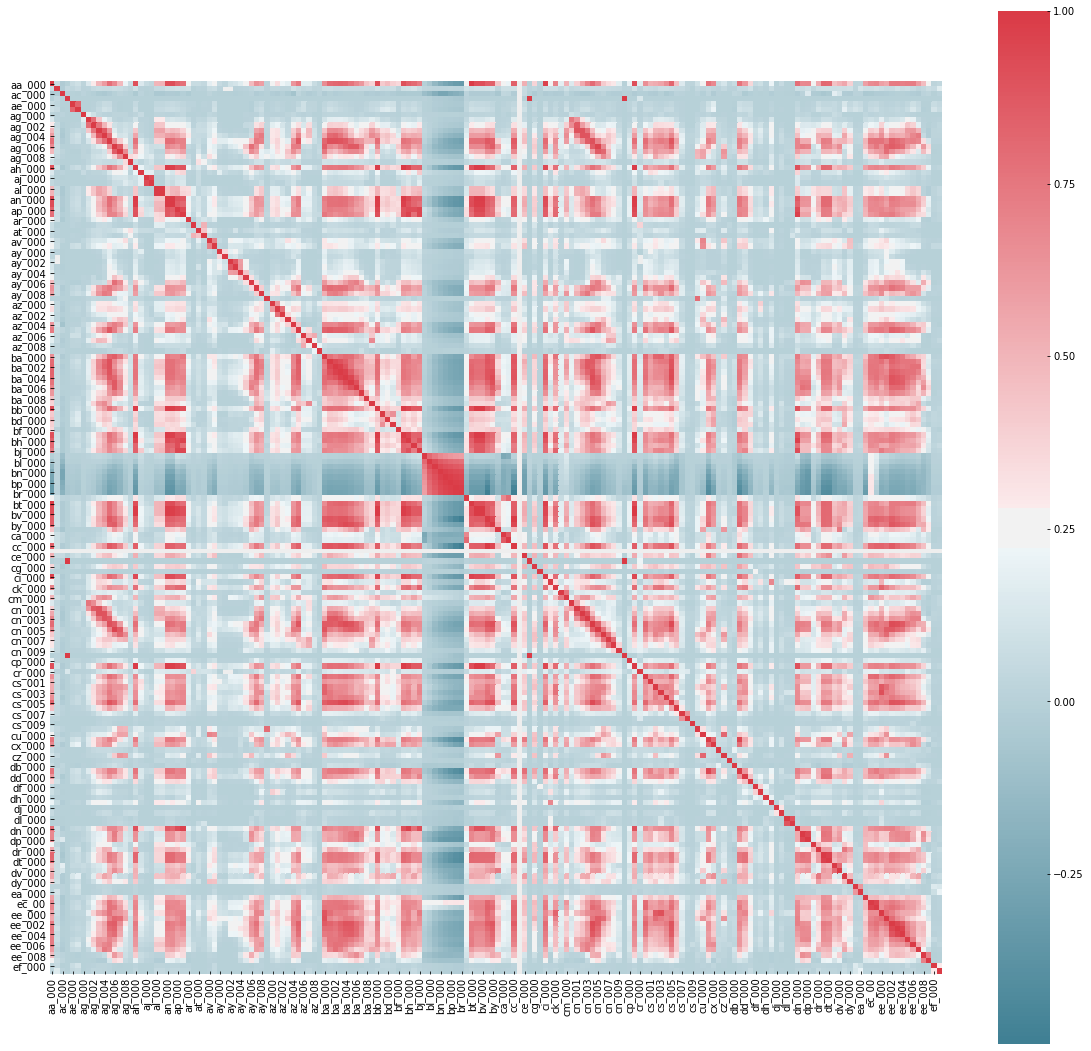

In [62]:
f, ax = plt.subplots(figsize=(20, 19))
corr = train_df1.corr()
sns.heatmap(corr,
            mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

96


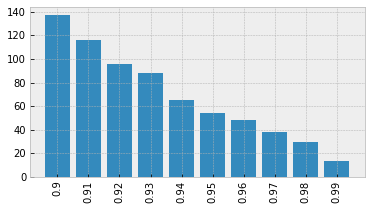

In [92]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, th):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    i=0
    while au_corr[i] > th: 
        i+=1
    return au_corr[0:i]

print (len(get_top_abs_correlations(train_df1,.92)))

import numpy as np
import matplotlib.pyplot as plt
height = [0.9, 0.91, 0.92, 0.93, 0.94,0.95,0.96,0.97,0.98,0.99]
y_posi=[]
for i in range (len(height)):
    y_posi.append(len(get_top_abs_correlations(train_df1,height[i])))


    
# Basic plot
bars = ('0.9', '0.91', '0.92', '0.93', '0.94','0.95','0.96','0.97','0.98','0.99')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, y_posi)
 
# Create names on the x-axis
#plt.xticks(y_pos, bars, color='black')
plt.yticks(color='black')
 
# Rotation of the bars names
plt.xticks(y_pos, bars, rotation=90)
 
# Custom the subplot layout
plt.subplots_adjust(bottom=0.4, top=0.99)

plt.style.use('bmh')
    
# Show graphic
plt.show()

In [21]:
train_df = pd.concat([train_df_class, train_df1], axis=1)

### TEST DATASET

In [22]:
datadict = pd.DataFrame(test_df.dtypes)
# identify missing values of the 69 columns,add the stats to the datadict
test_df = test_df.replace('na',np.NaN)
datadict['MissingVal'] = test_df.isna().sum()
# Identify number of unique values, For object nunique will the number of levels
datadict['NUnique']=test_df.nunique()
# Identify the count for each variable, add the stats to datadict
datadict['Count']=test_df.count()
# rename the 0 column
datadict = datadict.rename(columns={0:'DataType'})
print(datadict)

       DataType  MissingVal  NUnique  Count
class    object           0        2  16000
aa_000    int64           0     9237  16000
ab_000   object       12363       18   3637
ac_000   object         926     1311  15074
ad_000   object        3981     1202  12019
ae_000   object         690      170  15310
af_000   object         690      201  15310
ag_000   object         189       59  15811
ag_001   object         189      221  15811
ag_002   object         189      800  15811
ag_003   object         189     2835  15811
ag_004   object         189     8647  15811
ag_005   object         189    13578  15811
ag_006   object         189    13400  15811
ag_007   object         189    10396  15811
ag_008   object         189     7335  15811
ag_009   object         189     2670  15811
ah_000   object         175    14139  15825
ai_000   object         163     1457  15837
aj_000   object         163      460  15837
ak_000   object        1198       59  14802
al_000   object         169     

In [23]:
test_df1 = test_df.iloc[:,1:]

In [24]:
test_df_class = test_df.iloc[:,:1]
test_df_class1 = test_df.iloc[:,:1]

In [25]:
test_df1 = test_df1.astype(float)

In [26]:
test_df = pd.concat([test_df_class, test_df1], axis=1)

In [27]:
datadict = pd.DataFrame(test_df.dtypes)
# identify missing values of the 69 columns,add the stats to the datadict
test_df = test_df.replace('na',np.NaN)
datadict['MissingVal'] = test_df.isna().sum()
# Identify number of unique values, For object nunique will the number of levels
datadict['NUnique']=test_df.nunique()
# Identify the count for each variable, add the stats to datadict
datadict['Count']=test_df.count()
# rename the 0 column
datadict = datadict.rename(columns={0:'DataType'})
print(datadict)

       DataType  MissingVal  NUnique  Count
class    object           0        2  16000
aa_000  float64           0     9237  16000
ab_000  float64       12363       18   3637
ac_000  float64         926     1311  15074
ad_000  float64        3981     1202  12019
ae_000  float64         690      170  15310
af_000  float64         690      201  15310
ag_000  float64         189       59  15811
ag_001  float64         189      221  15811
ag_002  float64         189      800  15811
ag_003  float64         189     2835  15811
ag_004  float64         189     8647  15811
ag_005  float64         189    13578  15811
ag_006  float64         189    13400  15811
ag_007  float64         189    10396  15811
ag_008  float64         189     7335  15811
ag_009  float64         189     2670  15811
ah_000  float64         175    14139  15825
ai_000  float64         163     1457  15837
aj_000  float64         163      460  15837
ak_000  float64        1198       59  14802
al_000  float64         169     

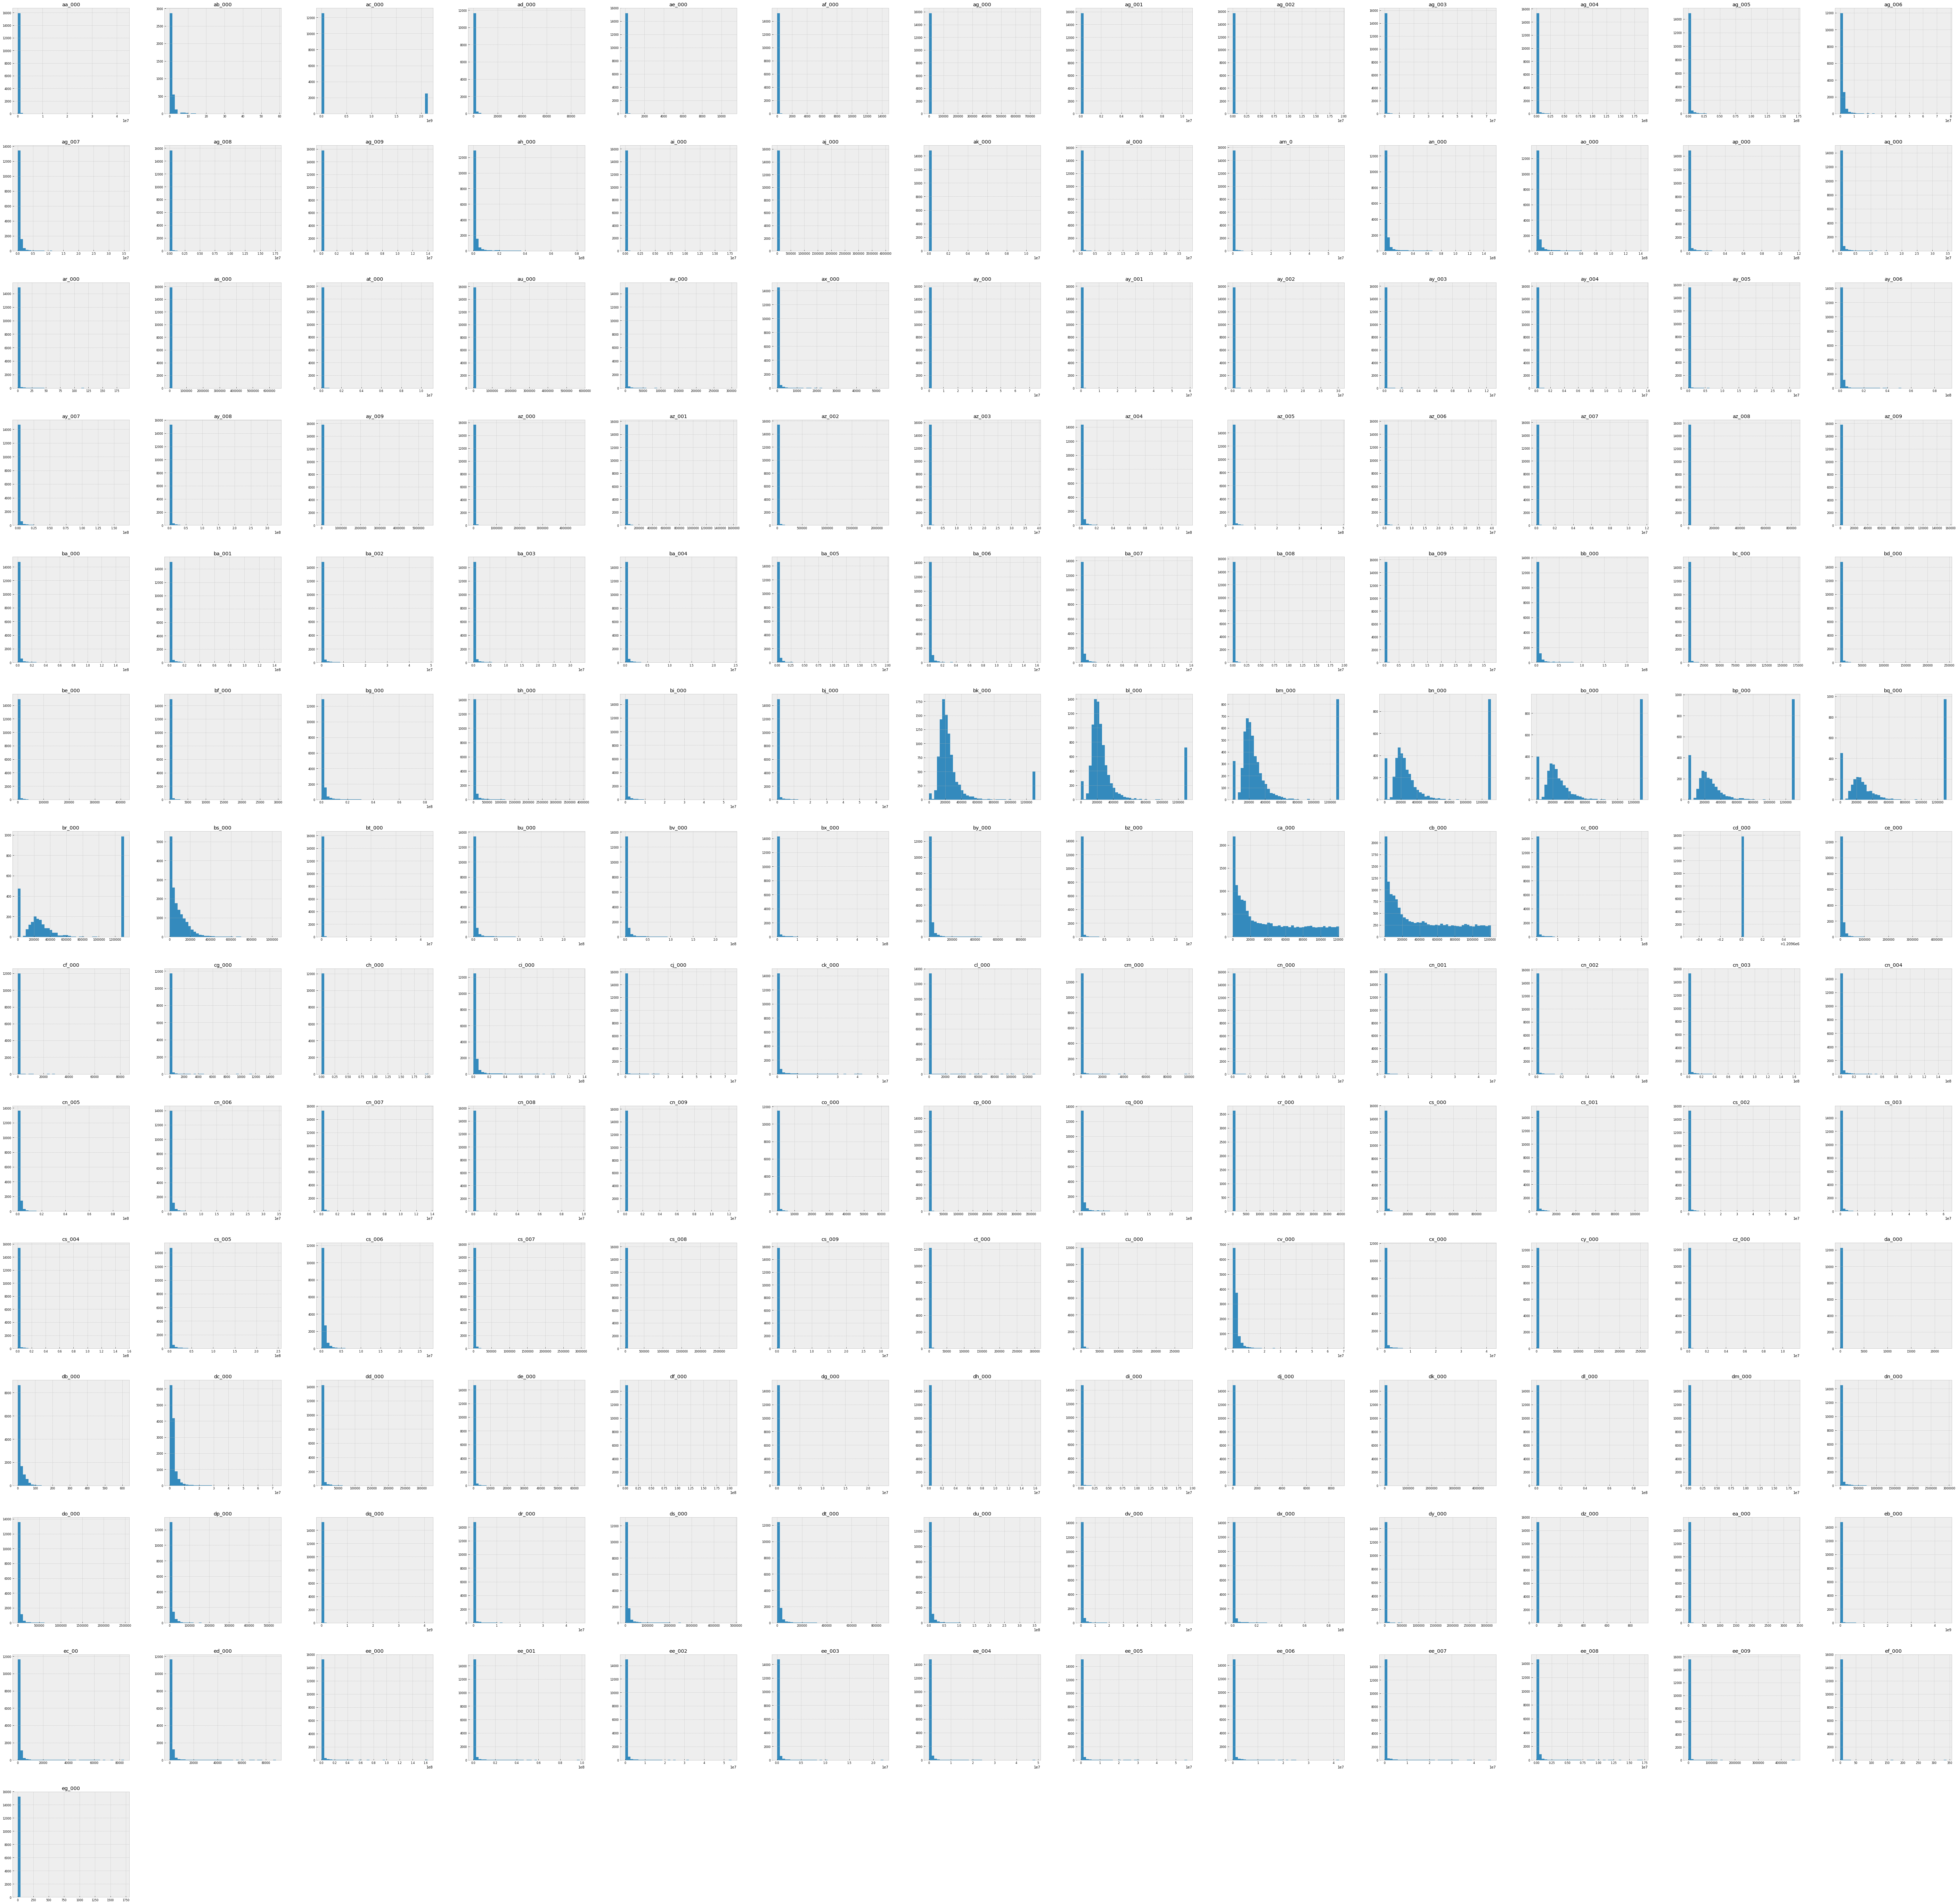

In [28]:
test_df_num = test_df.select_dtypes(include = ['object', 'float64'])
test_df.hist(figsize=(100, 100), bins=40, xlabelsize=8, ylabelsize=8);

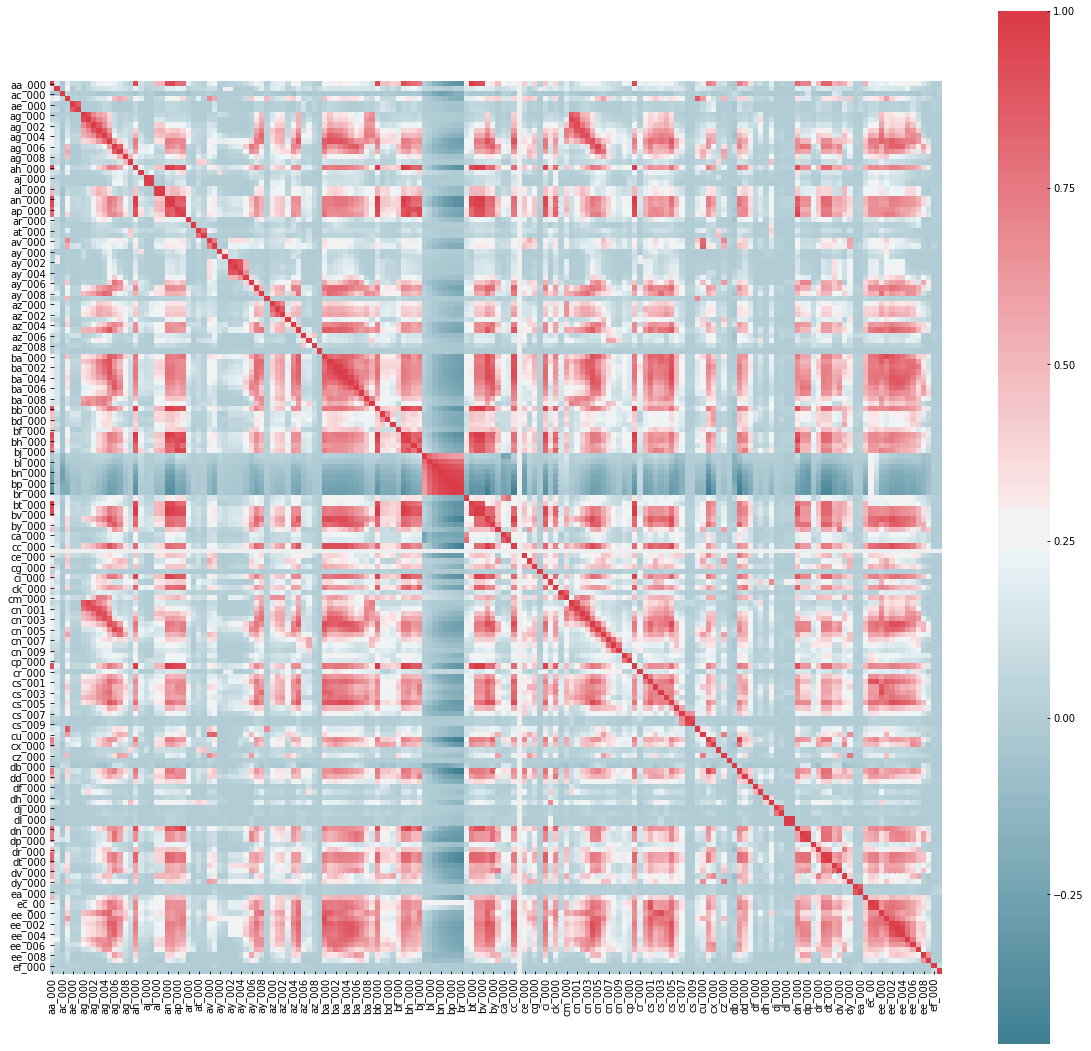

In [29]:
f, ax = plt.subplots(figsize=(20, 19))
corr = test_df1.corr()
sns.heatmap(corr,
            mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [30]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, th):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    i=0
    while au_corr[i] > th: 
        i+=1
    return au_corr[0:i]

print (get_top_abs_correlations(test_df1,0.94))

bu_000  cq_000    1.000000
ah_000  bg_000    1.000000
bb_000  bv_000    1.000000
aa_000  bt_000    1.000000
bb_000  cq_000    1.000000
bv_000  cq_000    1.000000
bb_000  bu_000    1.000000
bu_000  bv_000    1.000000
bx_000  cc_000    0.997661
al_000  am_0      0.992949
an_000  ao_000    0.992820
        bg_000    0.988538
ah_000  an_000    0.988526
an_000  bv_000    0.987589
        bu_000    0.987589
        cq_000    0.987589
        bb_000    0.987498
bq_000  br_000    0.987316
bp_000  bq_000    0.983978
ah_000  bv_000    0.983824
        bu_000    0.983824
        cq_000    0.983824
bg_000  bv_000    0.983809
        bu_000    0.983808
        cq_000    0.983808
ah_000  bb_000    0.983523
bb_000  bg_000    0.983492
dl_000  dm_000    0.983221
bn_000  bo_000    0.980271
ao_000  bb_000    0.977037
                    ...   
ec_00   ed_000    0.960483
bn_000  bp_000    0.958284
cv_000  dc_000    0.957545
ap_000  bj_000    0.955886
bb_000  ci_000    0.955416
an_000  ci_000    0.955376
b

In [31]:
test_df = pd.concat([test_df_class, test_df1], axis=1)

### Get Model Score from Dropping Columns with Missing Values - TRAIN 

In [32]:
X_train = train_df.drop(['class'], axis='columns' )
X_test = test_df.drop(['class'], axis='columns' )
print(X_train.shape)

from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer(strategy= 'median')

imputed_X_train = my_imputer.fit_transform(X_train)
imputed_X_test = my_imputer.fit_transform(X_test)
clean_train = pd.DataFrame.from_records(imputed_X_train)
clean_test = pd.DataFrame.from_records(imputed_X_test)

(60000, 170)


In [33]:
print(clean_train)

            0    1             2       3      4      5    6    7       8    \
0       76698.0  0.0  2.130706e+09   280.0    0.0    0.0  0.0  0.0     0.0   
1       33058.0  0.0  0.000000e+00   126.0    0.0    0.0  0.0  0.0     0.0   
2       41040.0  0.0  2.280000e+02   100.0    0.0    0.0  0.0  0.0     0.0   
3          12.0  0.0  7.000000e+01    66.0    0.0   10.0  0.0  0.0     0.0   
4       60874.0  0.0  1.368000e+03   458.0    0.0    0.0  0.0  0.0     0.0   
5       38312.0  0.0  2.130706e+09   218.0    0.0    0.0  0.0  0.0     0.0   
6          14.0  0.0  6.000000e+00   126.0    0.0    0.0  0.0  0.0     0.0   
7      102960.0  0.0  2.130706e+09   116.0    0.0    0.0  0.0  0.0     0.0   
8       78696.0  0.0  0.000000e+00   126.0    0.0    0.0  0.0  0.0     0.0   
9      153204.0  0.0  1.820000e+02   126.0    0.0    0.0  0.0  0.0     0.0   
10      39196.0  0.0  2.040000e+02   170.0    0.0    0.0  0.0  0.0     0.0   
11      45912.0  0.0  0.000000e+00   454.0    0.0    0.0  0.0  0

In [34]:
clean_train = pd.concat([train_df_class1, clean_train], axis=1, sort=False)
print(clean_train)

      class         0    1             2       3      4      5    6    7  \
0       neg   76698.0  0.0  2.130706e+09   280.0    0.0    0.0  0.0  0.0   
1       neg   33058.0  0.0  0.000000e+00   126.0    0.0    0.0  0.0  0.0   
2       neg   41040.0  0.0  2.280000e+02   100.0    0.0    0.0  0.0  0.0   
3       neg      12.0  0.0  7.000000e+01    66.0    0.0   10.0  0.0  0.0   
4       neg   60874.0  0.0  1.368000e+03   458.0    0.0    0.0  0.0  0.0   
5       neg   38312.0  0.0  2.130706e+09   218.0    0.0    0.0  0.0  0.0   
6       neg      14.0  0.0  6.000000e+00   126.0    0.0    0.0  0.0  0.0   
7       neg  102960.0  0.0  2.130706e+09   116.0    0.0    0.0  0.0  0.0   
8       neg   78696.0  0.0  0.000000e+00   126.0    0.0    0.0  0.0  0.0   
9       pos  153204.0  0.0  1.820000e+02   126.0    0.0    0.0  0.0  0.0   
10      neg   39196.0  0.0  2.040000e+02   170.0    0.0    0.0  0.0  0.0   
11      neg   45912.0  0.0  0.000000e+00   454.0    0.0    0.0  0.0  0.0   
12      neg 

In [35]:
datadict = pd.DataFrame(clean_train.dtypes)
# identify missing values of the 69 columns,add the stats to the datadict
clean_train = clean_train.replace('na',np.NaN)
datadict['MissingVal'] = clean_train.isna().sum()
# Identify number of unique values, For object nunique will the number of levels
datadict['NUnique']=clean_train.nunique()
# Identify the count for each variable, add the stats to datadict
datadict['Count']=clean_train.count()
# rename the 0 column
datadict = datadict.rename(columns={0:'DataType'})
print(datadict)

      DataType  MissingVal  NUnique  Count
class   object           0        2  60000
0      float64           0    22095  60000
1      float64           0       29  60000
2      float64           0     2061  60000
3      float64           0     1886  60000
4      float64           0      333  60000
5      float64           0      418  60000
6      float64           0      154  60000
7      float64           0      617  60000
8      float64           0     2422  60000
9      float64           0     7879  60000
10     float64           0    23071  60000
11     float64           0    40797  60000
12     float64           0    40615  60000
13     float64           0    32125  60000
14     float64           0    18932  60000
15     float64           0     5355  60000
16     float64           0    43571  60000
17     float64           0     4055  60000
18     float64           0      894  60000
19     float64           0      159  60000
20     float64           0     9017  60000
21     floa

In [35]:
clean_train.to_csv('./clean_data/clean_train.csv', sep=',',index = False, header = train_columns)

### Get Model Score from Dropping Columns with Missing Values - TEST

In [36]:
print(clean_test)

             0         1             2            3         4         5    \
0           60.0  0.000000  2.000000e+01    12.000000  0.000000   0.00000   
1           82.0  0.000000  6.800000e+01    40.000000  0.000000   0.00000   
2        66002.0  2.000000  2.120000e+02   112.000000  0.000000   0.00000   
3        59816.0  0.772065  1.010000e+03   936.000000  0.000000   0.00000   
4         1814.0  0.772065  1.560000e+02   140.000000  0.000000   0.00000   
5          174.0  0.772065  2.600000e+01    24.000000  0.000000   0.00000   
6        40202.0  0.772065  6.400000e+02   606.000000  0.000000   0.00000   
7       120278.0  0.772065  2.130706e+09   256.000000  0.000000   0.00000   
8        14592.0  0.000000  2.130706e+09   162.000000  0.000000   0.00000   
9        28338.0  0.772065  2.130706e+09   238.000000  0.000000   0.00000   
10       30758.0  0.772065  4.500000e+02   402.000000  0.000000   0.00000   
11       40358.0  0.772065  1.672000e+03  1378.000000  0.000000   0.00000   

In [37]:
clean_test = pd.concat([test_df_class1, clean_test], axis=1, sort=False)
print(clean_test)

      class          0         1             2            3         4  \
0       neg       60.0  0.000000  2.000000e+01    12.000000  0.000000   
1       neg       82.0  0.000000  6.800000e+01    40.000000  0.000000   
2       neg    66002.0  2.000000  2.120000e+02   112.000000  0.000000   
3       neg    59816.0  0.772065  1.010000e+03   936.000000  0.000000   
4       neg     1814.0  0.772065  1.560000e+02   140.000000  0.000000   
5       neg      174.0  0.772065  2.600000e+01    24.000000  0.000000   
6       neg    40202.0  0.772065  6.400000e+02   606.000000  0.000000   
7       neg   120278.0  0.772065  2.130706e+09   256.000000  0.000000   
8       neg    14592.0  0.000000  2.130706e+09   162.000000  0.000000   
9       neg    28338.0  0.772065  2.130706e+09   238.000000  0.000000   
10      neg    30758.0  0.772065  4.500000e+02   402.000000  0.000000   
11      neg    40358.0  0.772065  1.672000e+03  1378.000000  0.000000   
12      neg    33072.0  0.772065  3.580393e+08   43

In [41]:
datadict = pd.DataFrame(clean_test.dtypes)
# identify missing values of the 69 columns,add the stats to the datadict
clean_test = clean_test.replace('na',np.NaN)
datadict['MissingVal'] = clean_test.isna().sum()
# Identify number of unique values, For object nunique will the number of levels
datadict['NUnique']=clean_test.nunique()
# Identify the count for each variable, add the stats to datadict
datadict['Count']=clean_test.count()
# rename the 0 column
datadict = datadict.rename(columns={0:'DataType'})
print(datadict)

      DataType  MissingVal  NUnique  Count
class   object           0        2  16000
0      float64           0     9237  16000
1      float64           0       19  16000
2      float64           0     1312  16000
3      float64           0     1203  16000
4      float64           0      171  16000
5      float64           0      202  16000
6      float64           0       60  16000
7      float64           0      222  16000
8      float64           0      801  16000
9      float64           0     2836  16000
10     float64           0     8648  16000
11     float64           0    13579  16000
12     float64           0    13401  16000
13     float64           0    10397  16000
14     float64           0     7336  16000
15     float64           0     2671  16000
16     float64           0    14140  16000
17     float64           0     1458  16000
18     float64           0      461  16000
19     float64           0       60  16000
20     float64           0     3810  16000
21     floa

In [38]:
clean_test.to_csv('./clean_data/clean_test.csv', sep=',',index = False, header = test_columns)